In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data= pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

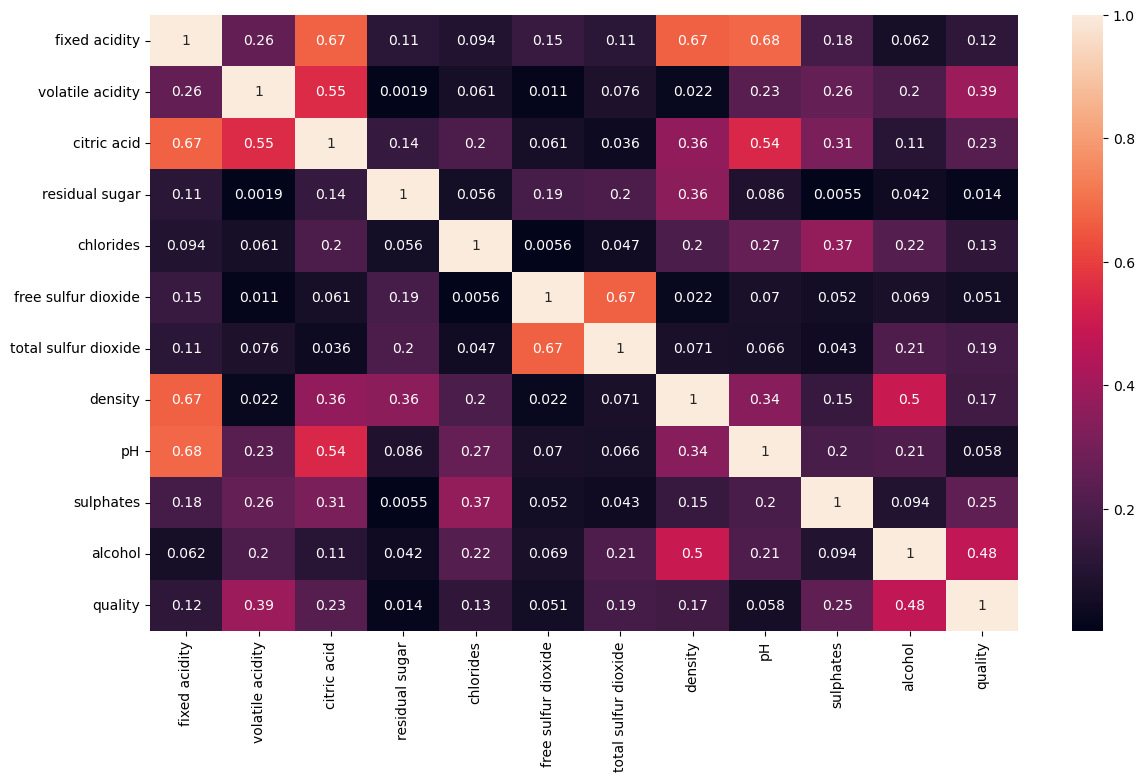

In [6]:
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

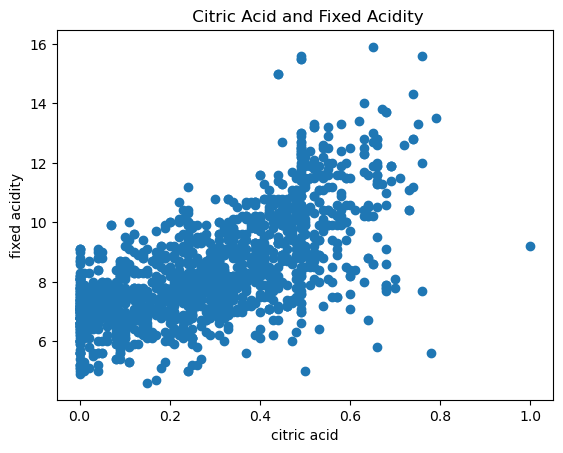

In [7]:
plt.scatter(data['citric acid'], data['fixed acidity'])
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')
plt.title(' Citric Acid and Fixed Acidity')
plt.show()

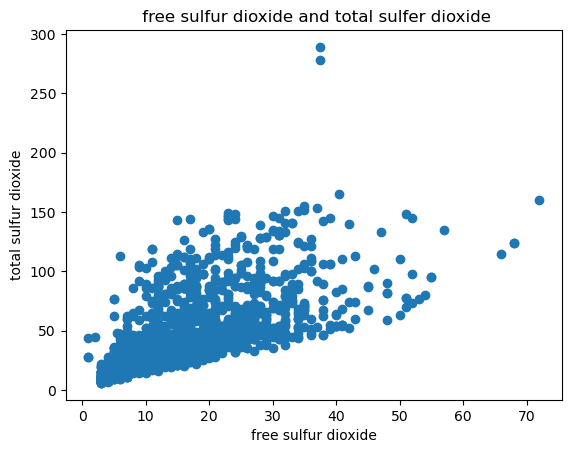

In [8]:
plt.scatter(data['free sulfur dioxide'], data['total sulfur dioxide'])
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.title(' free sulfur dioxide and total sulfer dioxide')
plt.show()

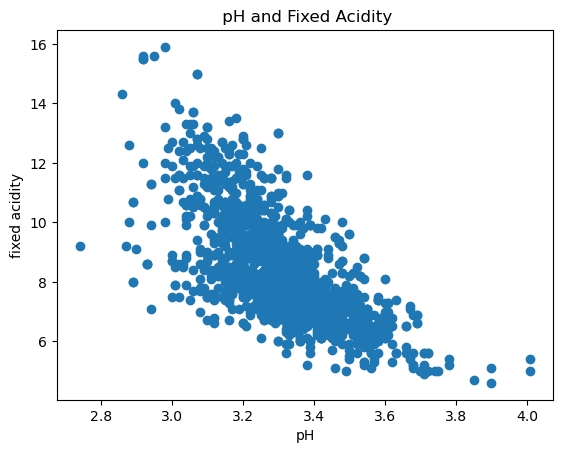

In [9]:
plt.scatter(data['pH'], data['fixed acidity'])
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.title(' pH and Fixed Acidity')
plt.show()

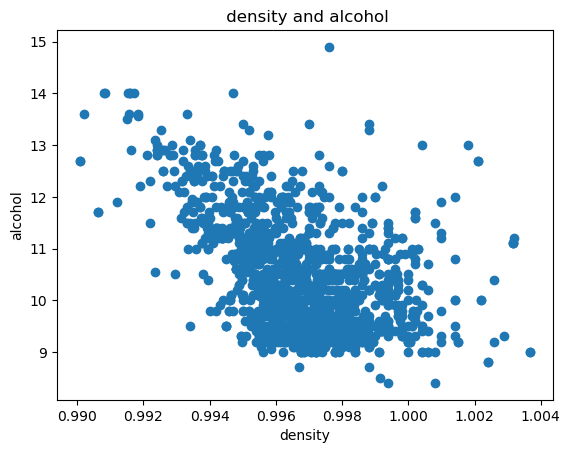

In [10]:
plt.scatter(data['density'], data['alcohol'])
plt.xlabel('density')
plt.ylabel('alcohol')
plt.title(' density and alcohol')
plt.show()

In [11]:
cutoff = 7
data['Good'] = (data['quality'] >= cutoff).astype(int)

In [12]:
x= data.drop (columns= ['density','free sulfur dioxide', 'citric acid', 'quality'])
y= data ['quality']

In [13]:
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.25, random_state= 41)

In [14]:
def metric_score(clf, x_train, x_test, y_train, y_test, train):
    if train:
        y_pred = clf.predict(x_train)
        print('\n====Train result====')
        print(f'accuracy score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
        print('\n\n Train Classification Report \n', classification_report(y_train, y_pred, digits=2))
    else:
        y_pred = clf.predict(x_test)
        print('\n====Test result====')
        print(f'accuracy score: {accuracy_score(y_test, y_pred) * 100:.2f}%')
        print('\n\n Test Classification Report \n', classification_report(y_test, y_pred, digits=2))


In [15]:
clf= DecisionTreeClassifier()
clf.fit (x_train, y_train)

DecisionTreeClassifier()

In [16]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)
metric_score(clf, x_train, x_test, y_train, y_test, train=False)


====Train result====
accuracy score: 100.00%


 Train Classification Report 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       524
           6       1.00      1.00      1.00       470
           7       1.00      1.00      1.00       142
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199


====Test result====
accuracy score: 71.75%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.24      0.36      0.29        11
           5       0.69      0.73      0.71       157
           6       0.76      0.68      0.72       168
           7       0.95      0.

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf= RandomForestClassifier()
clf.fit (x_train, y_train)

RandomForestClassifier()

In [19]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred= clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[  0,   2,   1,   0,   0,   0],
       [  1,   3,   5,   2,   0,   0],
       [  0,   7, 117,  33,   0,   0],
       [  1,  13,  47, 107,   0,   0],
       [  0,   0,   0,   0,  51,   6],
       [  0,   0,   0,   0,   3,   1]], dtype=int64)

In [21]:
feature_name=list(x.columns)
class_name= list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol',
 'Good']

In [22]:
feature_name = list(map(str, feature_name))
class_name = list(map(str, class_name))

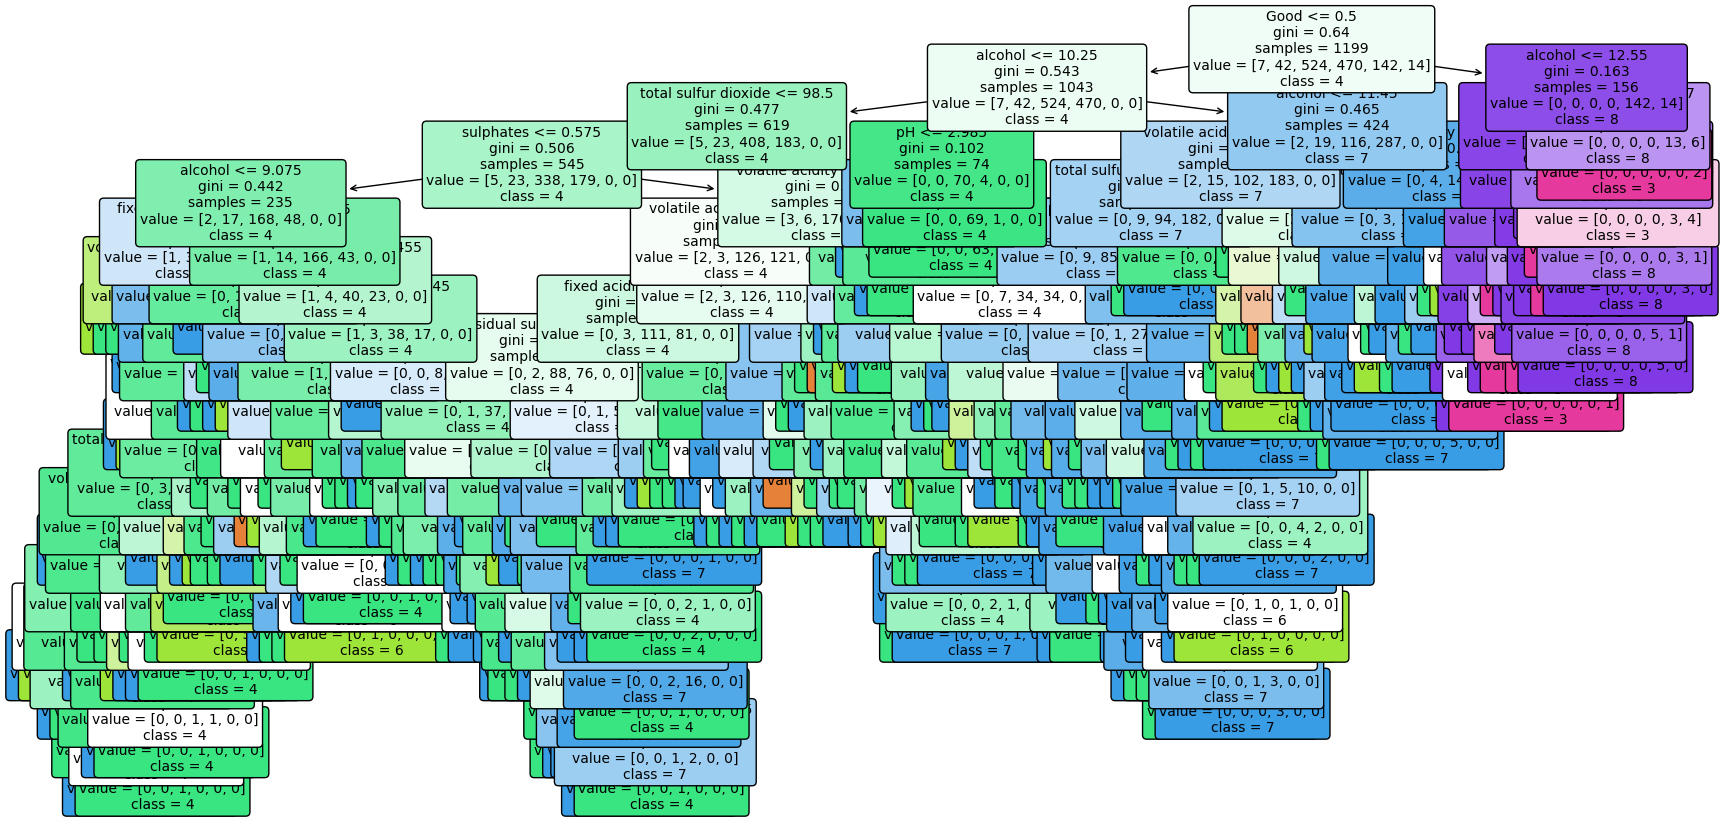

In [23]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=feature_name, class_names=class_name, rounded=True, fontsize=10)
plt.savefig("wine_decision_tree.png")
plt.show()


In [25]:
from sklearn.tree import export_text
tree_text = export_text(clf, feature_names= feature_name)
print(tree_text)


|--- Good <= 0.50
|   |--- alcohol <= 10.25
|   |   |--- total sulfur dioxide <= 98.50
|   |   |   |--- sulphates <= 0.57
|   |   |   |   |--- alcohol <= 9.08
|   |   |   |   |   |--- fixed acidity <= 7.80
|   |   |   |   |   |   |--- volatile acidity <= 0.60
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- volatile acidity >  0.60
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- fixed acidity >  7.80
|   |   |   |   |   |   |--- residual sugar <= 2.05
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- residual sugar >  2.05
|   |   |   |   |   |   |   |--- sulphates <= 0.56
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |--- sulphates >  0.56
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- alcohol >  9.08
|   |   |   |   |   |--- alcohol <= 9.75
|   |   |   |   |   |   |--- pH <= 3.54
|   |   |   |   |   |   |   |--- residual sugar <= 4.75
|   |   |   |   |   |   |   |   |--- vola

In [26]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range (10,20),
    'min_samples_leaf': range(2,10),
    'min_samples_split': range (2,10),
    'max_leaf_nodes': range (3,10)
}

In [27]:
grid_search= GridSearchCV(estimator=clf,
                         param_grid=grid_param,
                         cv=5,
                         n_jobs=-1)

In [28]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(3, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [29]:
best_parameters= grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [33]:
clf=DecisionTreeClassifier(criterion= 'entropy', min_samples_split= 2, max_depth=15, min_samples_leaf=2)
clf.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2)

In [34]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)
metric_score(clf, x_train, x_test, y_train, y_test, train=False)


====Train result====
accuracy score: 90.91%


 Train Classification Report 
               precision    recall  f1-score   support

           3       0.64      1.00      0.78         7
           4       0.66      0.93      0.77        42
           5       0.88      0.95      0.92       524
           6       0.97      0.84      0.90       470
           7       0.97      1.00      0.99       142
           8       1.00      0.71      0.83        14

    accuracy                           0.91      1199
   macro avg       0.85      0.91      0.86      1199
weighted avg       0.92      0.91      0.91      1199


====Test result====
accuracy score: 66.50%


 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.18      0.11        11
           5       0.64      0.73      0.68       157
           6       0.74      0.59      0.66       168
           7       0.94      0.8

In [35]:
x= data.drop (columns= ['density','free sulfur dioxide', 'citric acid', 'quality'])
y= data ['quality']
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.25, random_state= 41)
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {'DecisionTreeClassifier': dt, 'RandomForestClassifier': rf}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(x_train, y_train)
    y_prob = model.predict_proba(x_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='quality')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: multiclass format is not supported

<Figure size 1000x600 with 0 Axes>

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

x= data.drop (columns= ['density','free sulfur dioxide', 'citric acid', 'quality'])
y= data ['quality']
clf = DecisionTreeClassifier()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) 
accuracy_scores = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = sum(accuracy_scores) / n_splits
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Mean Accuracy: 0.72


In [43]:
import pickle
filename='wine_Classifier.pkl'
pickle.dump(clf,open(filename, 'wb'))
loaded_model=pickle.load(open('wine_Classifier.pkl', 'rb'))